# ***Optimization #1: Linear Programming***

In this example, we solve a linear programming problem using `minimize` to minimize a cost function, which is defined based on equipment load ratios. The objective function represents the cost as a function of these load ratios, aiming to reduce operating costs while adhering to constraints.

Key Points:
* Objective Function: This function calculates the total cost based on load ratios.
* Constraints: We set an equality constraint to balance the total load and multiple inequality constraints to ensure load ratios stay within a range.
* Method: We use `trust-constr`, which is a reliable method for constrained optimization. Further details are provided [here](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#optimization-scipy-optimize) and [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):


In [16]:
import numpy as np
from scipy.optimize import minimize


# Define cost function: Linear Objective Function for optimization
def fun(x):
    return (x[0] * 3 / (4.4 - 6 * (1 - x[0]))) + (x[1] * 3 / (5.8 - 12 * (1 - x[1])))


# Equality constraint
Aeq = np.array([3, 3])
beq = 5


def eq_constraint(x):
    return np.dot(Aeq, x) - beq


# Inequality constraints
A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([1, 1, 0, 0])
ineq_constraints = [
    {"type": "ineq", "fun": lambda x, i=i: b[i] - np.dot(A[i], x)}
    for i in range(len(b))
]

# Initial guess
x0 = [0, 0]

# Optimized decision with trust-constr method and tighter tolerance
result = minimize(
    fun,
    x0,
    method="trust-constr",  # "trust-region constrained" optimization method
    constraints=[{"type": "eq", "fun": eq_constraint}] + ineq_constraints,
    bounds=[
        (0, 1),
        (0, 1),
    ],  # Redundancy for this example: both the inequality constraints and bounds essentially achieve the same result
    options={"xtol": 1e-9, "gtol": 1e-9, "maxiter": 1000},
)

x_optimized = np.round(result.x, 2)

print("Optimized x:", x_optimized)


Optimized x: [0.71 0.95]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


In [22]:
0.71 * 3
0.95 * 3
0.71 * 3 / (4.4 - 6 * (1 - 0.71))
0.95 * 3 / (5.8 - 12 * (1 - 0.95))
result.fun
result.nit

46

# **Optimization #2: Quadratic Programming with Non-linear Objective Function**

In this block, we build on the first example by using a non-linear objective function that models how efficiency changes as the load ratio varies. Non-linear programming allows for more complex relationships within the cost function, accommodating real-world variability in equipment performance.

Key Points:

* Objective Function: The function is quadratic in nature, representing more complex load-cost relationships.
* Method: The same `trust-constr` method is used with strict tolerance settings for accurate results.

In [2]:
import numpy as np
from scipy.optimize import minimize


# Define cost function: Quadratic Objective Function for optimization
def fun(x):
    return (x[0] * 3 / (4.4 - 18 * (1 - x[0]) ** 2)) + (
        x[1] * 3 / (5.8 - 48 * (1 - x[1]) ** 2)
    )


# Equality constraint
Aeq = np.array([3, 3])
beq = 5


def eq_constraint(x):
    return np.dot(Aeq, x) - beq


# Inequality constraints
A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([1, 1, 0, 0])
ineq_constraints = [
    {"type": "ineq", "fun": lambda x, i=i: b[i] - np.dot(A[i], x)}
    for i in range(len(b))
]

# Initial guess
x0 = [0, 0]

# Optimized decision with trust-constr method and tighter tolerance
result = minimize(
    fun,
    x0,
    method="trust-constr",
    constraints=[{"type": "eq", "fun": eq_constraint}] + ineq_constraints,
    bounds=[(0, 1), (0, 1)],
    options={"xtol": 1e-9, "gtol": 1e-9, "maxiter": 1000},
)

x_optimized = np.round(result.x, 2)

print("Optimized x:", x_optimized);


Optimized x: [0.79 0.88]


In [ ]:
import numpy as np
from scipy.optimize import minimize


# Define cost function: Quadratic Objective Function for optimization
def fun(x):
    numerator1 = x[0] * 3
    denominator1 = -18 * x[0] ** 2 + 36 * x[0] - 13.6

    numerator2 = x[1] * 3
    denominator2 = -48 * x[1] ** 2 + 96 * x[1] - 42.2

    return (numerator1 / denominator1) + (numerator2 / denominator2)


# Equality constraint
Aeq = np.array([3, 3])
beq = 5


def eq_constraint(x):
    return np.dot(Aeq, x) - beq


# Inequality constraints
A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([1, 1, 0, 0])
ineq_constraints = [
    {"type": "ineq", "fun": lambda x, i=i: b[i] - np.dot(A[i], x)}
    for i in range(len(b))
]

# Initial guess
x0 = [0, 0]

# Optimized decision with trust-constr method and tighter tolerance
result = minimize(
    fun,
    x0,
    method="trust-constr",
    constraints=[{"type": "eq", "fun": eq_constraint}] + ineq_constraints,
    bounds=[(0, 1), (0, 1)],
    options={"xtol": 1e-9, "gtol": 1e-9, "maxiter": 1000},
)

x_optimized = np.round(result.x, 2)

print("Optimized x:", x_optimized);


In [23]:
# similar cost function and iterations
result.fun
result.nit

46

# **Optimization #3: Non-Linear Programming with Exponential Efficiency Model**

In this code block, we model an exponential relationship between load ratio and efficiency. This structure better represents systems where efficiency declines significantly at low or high load ratios. This approach captures more realistic scenarios, especially in energy and equipment management.

Key Points:

* Objective Function: The exponential form reflects diminishing efficiency with extreme load ratios.
* Non-linear Constraints: Using `trust-constr` allows handling complex, non-linear relationships between variables.

In [ ]:
import numpy as np


# Define cost function: Exponential Objective Function for optimization
def fun(x):
    return x[0] * 3 / (5.4 - 3 * np.exp(-((x[0] - 0.67) / 0.25))) + x[1] * 3 / (
        5.2 - 1.5 * np.exp(-((x[1] - 1) / 0.5))
    )


# Equality constraint
Aeq = np.array([3, 3])
beq = 5


def eq_constraint(x):
    return np.dot(Aeq, x) - beq


# Inequality constraints
A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([1, 1, 0, 0])
ineq_constraints = [
    {"type": "ineq", "fun": lambda x, i=i: b[i] - np.dot(A[i], x)}
    for i in range(len(b))
]

# Initial guess
x0 = [0, 0]

# Optimized decision with trust-constr method and tighter tolerance
result = minimize(
    fun,
    x0,
    method="trust-constr",
    constraints=[{"type": "eq", "fun": eq_constraint}] + ineq_constraints,
    bounds=[(0, 1), (0, 1)],
    options={"xtol": 1e-9, "gtol": 1e-9, "maxiter": 1000},
)

x_optimized = np.round(result.x, 2)

print("Optimized x:", x_optimized)

Optimized x: [0.85 0.81]


# **Optimization #4: Metaheuristic Optimization Using Differential Evolution**

This code demonstrates the Differential Evolution (DE) approach, a global optimization method well-suited for non-convex landscapes. DE explores the search space broadly and doesn’t rely on gradient information, making it suitable for highly non-linear problems.

Key Points:

* Differential Evolution: It’s a population-based algorithm that iteratively improves a population of candidate solutions.
* Parameter Tuning: Adjusting mutation and recombination rates helps control exploration and convergence behavior.


The error occurs because the `differential_evolution` function in scipy does not directly support equality constraints (constraints parameter) like `scipy.optimize.minimize` does above. To enforce the equality constraint like 3x_{1} + 3x_{2} = 5, we can approach it in the following way:

**Use Penalty in the Cost Function (Soft Constraint)**
Instead of adding a hard constraint, we incorporate a penalty in the cost_function if the constraint is violated. This will guide the optimizer towards solutions that satisfy the equality constraint:

*   Penalty Term: penalty = 1e6 * abs(constraint_value) adds a large value if the constraint is violated. This encourages the optimizer to meet the equality constraint by penalizing deviations.
*   Objective Value: The penalty is added to the objective value when the constraint is not met.

In [1]:
# upload the networks files produced by Matlab.

from google.colab import files

uploaded = files.upload()

Saving net_ch1_simple.mat to net_ch1_simple.mat
Saving net_ch2_simple.mat to net_ch2_simple.mat


In [30]:
net_ch1_simple  #

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Nov  7 16:07:49 2024',
 '__version__': '1.0',
 '__globals__': [],
 'IW_ch1': array([[array([[-2.19391585],
                [-2.05997463],
                [ 3.11984749]])],
        [array([], shape=(1, 0), dtype=float64)]], dtype=object),
 'LW_ch1': array([[array([], shape=(1, 0), dtype=float64),
         array([], shape=(1, 0), dtype=float64)],
        [array([[-0.11914881, -0.60051313,  0.18175241]]),
         array([], shape=(1, 0), dtype=float64)]], dtype=object),
 'b_ch1': array([[array([[ 7.17194159],
                [-0.83646133],
                [ 6.16938773]])],
        [array([[-0.19572506]])]], dtype=object)}

**Neural Network Structure (net_ch1)**


The network has:

  Input Weights (IW_ch1): These connect the input layer to the first hidden layer.

  Layer Weights (LW_ch1): These connect the hidden layer(s) to the subsequent layers, including potentially an output layer.

  Biases (b_ch1): These are additional parameters for each neuron that help shift the activation function, improving network flexibility and enabling better learning.
  
  Activation function (Hyperbolic Tangent 'tanh'): The purpose of an activation function in a neural network is to introduce nonlinearity into the model. This allows the network to capture complex patterns in the data that a purely linear model cannot.

Optimized x: [0.9795263  0.68714037]
Function value: 5.064191275445868


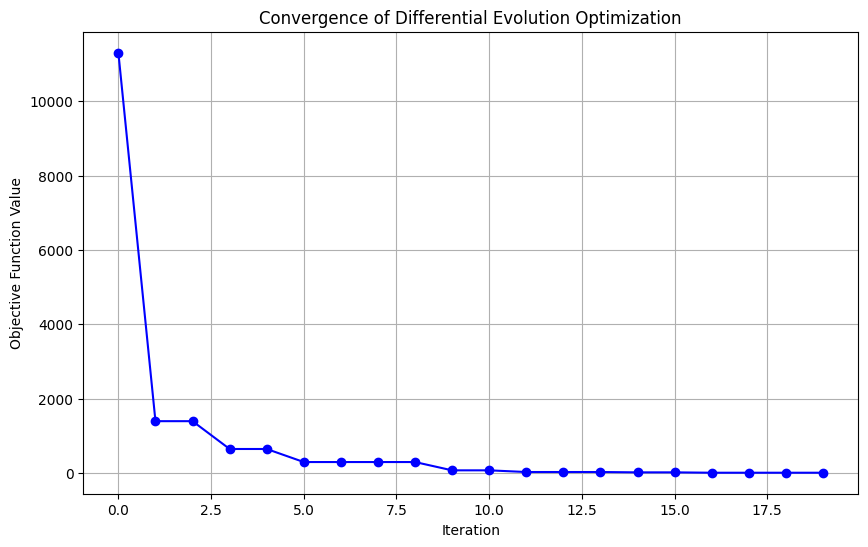

In [31]:
import numpy as np
from scipy.optimize import differential_evolution
import scipy.io
import matplotlib.pyplot as plt

# Load the simplified network data
net_ch1_simple = scipy.io.loadmat("/content/net_ch1_simple.mat")
net_ch2_simple = scipy.io.loadmat("/content/net_ch2_simple.mat")

# Extract weights and biases for net_ch1 and net_ch2
IW_ch1 = net_ch1_simple["IW_ch1"][0, 0][0] if net_ch1_simple["IW_ch1"].size else None
LW_ch1 = net_ch1_simple["LW_ch1"][1, 0] if net_ch1_simple["LW_ch1"].size else None
b_ch1 = net_ch1_simple["b_ch1"][0, 0][0] if net_ch1_simple["b_ch1"].size else None

IW_ch2 = net_ch2_simple["IW_ch1"][0, 0][0] if net_ch2_simple["IW_ch1"].size else None
LW_ch2 = net_ch2_simple["LW_ch1"][1, 0] if net_ch2_simple["LW_ch1"].size else None
b_ch2 = net_ch2_simple["b_ch1"][0, 0][0] if net_ch2_simple["b_ch1"].size else None


# Adjusted evaluate_network function to handle irregular data structure
def evaluate_network(IW, LW, b, x):
    if IW is None or b is None:
        return 0  # Return zero if there's no valid data

    # Calculate the input layer output
    IW_values = IW.flatten()
    b_values = b.flatten()
    layer_input = IW_values * x + b_values
    layer_output = np.tanh(
        layer_input
    )  # Activation function for the neurons in the hidden layer.

    # Return mean if there are multiple outputs
    return layer_output.mean() if layer_output.size > 1 else layer_output[0]


# Cost function with penalty for the equality constraint
def cost_function(x):
    y1 = evaluate_network(IW_ch1, LW_ch1, b_ch1, x[0])
    y2 = evaluate_network(IW_ch2, LW_ch2, b_ch2, x[1])
    objective_value = 3 * x[0] / y1 + 3 * x[1] / y2
    constraint_value = 3 * x[0] + 3 * x[1] - 5
    penalty = 1e6 * abs(constraint_value) if constraint_value != 0 else 0
    return objective_value + penalty


# Set bounds for x[0] and x[1] independently within [0, 1]
bounds = [(0, 1), (0, 1)]

# Initialize list to store objective values over iterations for convergence tracking
convergence_history = []


# Define callback function to store the minimum objective value per iteration
def callback(xk, convergence):
    fval = cost_function(xk)
    convergence_history.append(fval)


# Run differential evolution optimization with the callback function
result = differential_evolution(
    cost_function,
    bounds,
    strategy="best1bin",  # Similar to the default GA strategy
    popsize=100,  # Matches MATLAB's 'PopulationSize' of 100 individuals
    mutation=(0.5, 1),  # Default mutation range; adjust if needed
    recombination=0.7,  # Matches MATLAB's 'CrossoverFrac' of 0.7
    maxiter=20,  # Matches MATLAB's 'Generations' of 20
    tol=1e-6,  # Convergence tolerance (not directly like StallGen)
    seed=42,  # Ensures reproducibility
    callback=callback,  # Attach the callback function
)

# Display results
x_optimized = result.x
fval = result.fun
print("Optimized x:", x_optimized)
print("Function value:", fval)

# Plot convergence history
if convergence_history:  # Check if there's data to plot
    plt.figure(figsize=(10, 6))
    plt.plot(convergence_history, marker="o", linestyle="-", color="b")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.title("Convergence of Differential Evolution Optimization")
    plt.grid(True)
    plt.show()
else:
    print("No convergence data recorded.")


Differential Evolution Results:
Optimized x: [0.9795263  0.68714037]
Function value: 5.064191275445868
Execution time: 2.4128260612487793 seconds
Iterations until convergence: 20 

`xtol` termination condition is satisfied.
Number of iterations: 55, function evaluations: 51, CG iterations: 16, optimality: 8.22e-10, constraint violation: 0.00e+00, execution time: 0.35 s.
Trust-Constr Results:
Optimized x: [1.         0.66666667]
Function value: 5.040849908619018
Execution time: 0.3764505386352539 seconds
Iterations until convergence: 55 

Summary Comparison:
Differential Evolution - Time: 2.4128260612487793 seconds, Iterations: 20
Trust-Constr - Time: 0.3764505386352539 seconds, Iterations: 55


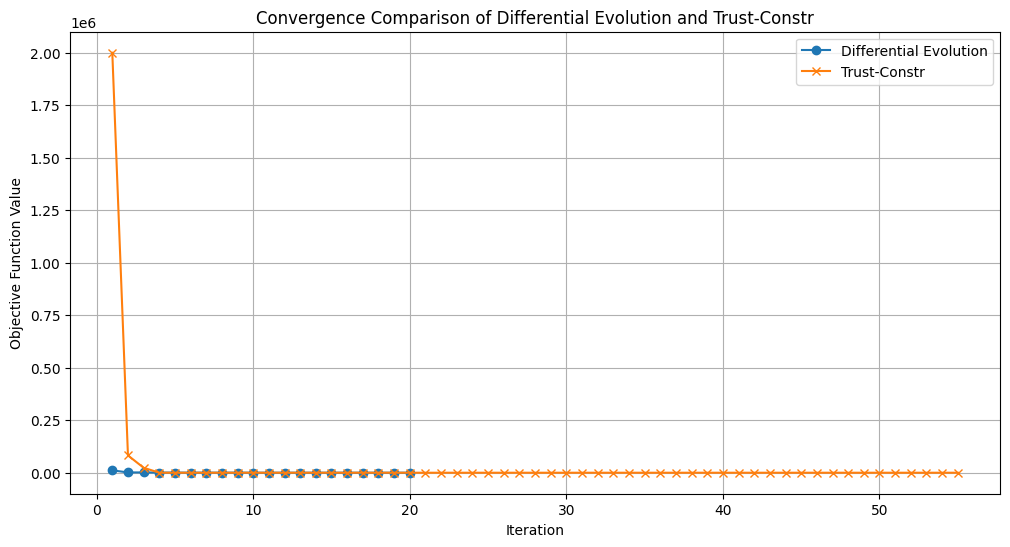

In [7]:
import numpy as np
from scipy.optimize import differential_evolution, minimize, Bounds
import scipy.io
import time
import matplotlib.pyplot as plt

# Load the simplified network data
net_ch1_simple = scipy.io.loadmat("/content/net_ch1_simple.mat")
net_ch2_simple = scipy.io.loadmat("/content/net_ch2_simple.mat")

# Extract weights and biases for net_ch1 and net_ch2
IW_ch1 = net_ch1_simple["IW_ch1"][0, 0][0] if net_ch1_simple["IW_ch1"].size else None
LW_ch1 = net_ch1_simple["LW_ch1"][1, 0] if net_ch1_simple["LW_ch1"].size else None
b_ch1 = net_ch1_simple["b_ch1"][0, 0][0] if net_ch1_simple["b_ch1"].size else None

IW_ch2 = net_ch2_simple["IW_ch1"][0, 0][0] if net_ch2_simple["IW_ch1"].size else None
LW_ch2 = net_ch2_simple["LW_ch1"][1, 0] if net_ch2_simple["LW_ch1"].size else None
b_ch2 = net_ch2_simple["b_ch1"][0, 0][0] if net_ch2_simple["b_ch1"].size else None


# Adjusted evaluate_network function to handle irregular data structure
def evaluate_network(IW, LW, b, x):
    if IW is None or b is None:
        return 0
    IW_values = IW.flatten()
    b_values = b.flatten()
    layer_input = IW_values * x + b_values
    layer_output = np.tanh(layer_input)
    return layer_output.mean() if layer_output.size > 1 else layer_output[0]


# Cost function with penalty for the equality constraint
def cost_function(x):
    y1 = evaluate_network(IW_ch1, LW_ch1, b_ch1, x[0])
    y2 = evaluate_network(IW_ch2, LW_ch2, b_ch2, x[1])
    objective_value = 3 * x[0] / y1 + 3 * x[1] / y2
    constraint_value = 3 * x[0] + 3 * x[1] - 5
    penalty = 1e6 * abs(constraint_value) if constraint_value != 0 else 0
    return objective_value + penalty


# Set bounds for x[0] and x[1] independently within [0, 1]
bounds = [(0, 1), (0, 1)]

# Tracking iterations and results for Differential Evolution
de_iterations = []
de_convergence_history = []


def de_callback(xk, convergence):
    fval = cost_function(xk)
    de_iterations.append(len(de_iterations) + 1)
    de_convergence_history.append(fval)


# Run differential evolution
start_time = time.time()
result_de = differential_evolution(
    cost_function,
    bounds,
    strategy="best1bin",  # Similar to the default GA strategy
    popsize=100,  # Matches MATLAB's 'PopulationSize' of 100 individuals
    mutation=(0.5, 1),  # Default mutation range; adjust if needed
    recombination=0.7,  # Matches MATLAB's 'CrossoverFrac' of 0.7
    maxiter=20,  # Matches MATLAB's 'Generations' of 20
    tol=1e-6,  # Convergence tolerance (not directly like StallGen)
    seed=42,  # Ensures reproducibility
    callback=de_callback,
)

de_time = time.time() - start_time

print("Differential Evolution Results:")
print("Optimized x:", result_de.x)
print("Function value:", result_de.fun)
print("Execution time:", de_time, "seconds")
print("Iterations until convergence:", len(de_iterations), "\n")

# Tracking convergence for trust-constr optimization
trust_iterations = []
trust_convergence_history = []


def trust_callback(xk, res):
    fval = cost_function(xk)
    trust_iterations.append(len(trust_iterations) + 1)
    trust_convergence_history.append(fval)


# Run trust-constr with callback to track iterations
start_time = time.time()
equality_constraint = {"type": "eq", "fun": lambda x: 3 * x[0] + 3 * x[1] - 5}
trust_bounds = Bounds([0, 0], [1, 1])
result_trust = minimize(
    cost_function,
    x0=[0.5, 0.5],
    method="trust-constr",
    constraints=[equality_constraint],
    bounds=trust_bounds,
    callback=trust_callback,  # Attach the callback function
    options={"disp": True, "gtol": 1e-16, "xtol": 1e-16},
)
trust_time = time.time() - start_time

print("Trust-Constr Results:")
print("Optimized x:", result_trust.x)
print("Function value:", result_trust.fun)
print("Execution time:", trust_time, "seconds")
print("Iterations until convergence:", result_trust.nit, "\n")

# Summary comparison
print("Summary Comparison:")
print(
    f"Differential Evolution - Time: {de_time} seconds, Iterations: {len(de_iterations)}"
)
print(f"Trust-Constr - Time: {trust_time} seconds, Iterations: {result_trust.nit}")

# Plot convergence comparison
plt.figure(figsize=(12, 6))
plt.plot(
    de_iterations, de_convergence_history, label="Differential Evolution", marker="o"
)
plt.plot(trust_iterations, trust_convergence_history, label="Trust-Constr", marker="x")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison of Differential Evolution and Trust-Constr")
plt.legend()
plt.grid(True)
plt.show()


# **Optimization #5: Central Heating Plant Optimization**

This example models a heating plant where multiple boilers need to meet different heating demands. Each boiler's efficiency varies based on its load, and we need to find the load distribution that meets specific heating demands efficiently.

Key Points:

* Objective Function: The energy cost is calculated based on load ratios for each boiler. The function models declining efficiency as boilers move away from optimal load.
* Constraints: Both upper and lower load limits are enforced, with an equality constraint for each target heating demand.

In [8]:
import numpy as np
from scipy.optimize import minimize, Bounds


# Define the original objective function without offsets or penalty terms
def objective(x):
    return (
        (x[0] * 6.6) / (0.88 - 1.1 * np.exp(-10 * x[0]))
        + (x[1] * 6.6) / (0.84 - 0.9 * np.exp(-8 * x[1]))
        + (x[2] * 6.6) / (0.86 - 1.6 * np.exp(-12 * x[2]))
        + (x[3] * 3.1) / (0.66 - 2.5 * np.exp(-22 * x[3]))
    )


# Using Bounds instead of inequality constraints
bounds = Bounds([0, 0, 0, 0], [1, 1, 1, 1])

# Initialize results storage
sequence = []

# Loop through heating demand (MW) levels and optimize part load ratios for each
for i in range(0, 21, 2):
    eq_constraints = {
        "type": "eq",
        "fun": lambda x: np.dot([6.6, 6.6, 6.6, 3.1], x) - i,
    }

    # Initial guess
    x0 = [0, 0, 0, 0]

    # Define additional options
    options = {
        "disp": False,  # Display iteration information
        "gtol": 1e-16,  # OptimalityTolerance
        "xtol": 1e-16,  # StepTolerance
        "finite_diff_rel_step": 1e-8,  # FiniteDifferenceStepSize
        "maxiter": 3000,  # MaxIterations
    }

    # Perform the optimization using `trust-constr` with the specified options
    result = minimize(
        objective,
        x0,
        method="trust-constr",
        bounds=bounds,
        constraints=[eq_constraints],
        options=options,
    )

    # Get the optimized values and round them
    x_optimized = np.round(result.x, 1)

    # Calculate the constraint value to verify it meets the requirement
    constraint_value = np.dot([6.6, 6.6, 6.6, 3.1], x_optimized)

    # Calculate the cost function (objective) value for the optimized x
    cost_value = objective(x_optimized)

    # Print details for each heating demand level
    print(
        f"Heating demand {i} MW: Optimized x = {x_optimized}, "
        f"Constraint Value = {constraint_value:.4f}, Cost Function Value = {cost_value:.4f}"
    )

    # Store the heating demand, optimized x values, constraint value, and cost value
    sequence.append([i] + x_optimized.tolist() + [constraint_value, cost_value])

# Convert sequence to a numpy array for easier manipulation and plotting
sequence = np.array(sequence)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:203: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Heating demand 0 MW: Optimized x = [-0. -0. -0.  0.], Constraint Value = 0.0000, Cost Function Value = 0.0000
Heating demand 2 MW: Optimized x = [0.  0.1 0.2 0. ], Constraint Value = 1.9800, Cost Function Value = 3.3617
Heating demand 4 MW: Optimized x = [0.2 0.2 0.2 0.1], Constraint Value = 4.2700, Cost Function Value = 6.4666
Heating demand 6 MW: Optimized x = [0.3 0.3 0.3 0.2], Constraint Value = 6.5600, Cost Function Value = 8.4211
Heating demand 8 MW: Optimized x = [0.4 0.4 0.4 0.2], Constraint Value = 8.5400, Cost Function Value = 10.4594
Heating demand 10 MW: Optimized x = [0.5 0.5 0.5 0.1], Constraint Value = 10.2100, Cost Function Value = 12.4535
Heating demand 12 MW: Optimized x = [0.7 0.5 0.5 0.2], Constraint Value = 11.8400, Cost Function Value = 14.1034
Heating demand 14 MW: Optimized x = [1.  0.6 0.5 0.2], Constraint Value = 14.4800, Cost Function Value = 17.0968
Heating demand 16 MW: Optimized x = [1.  0.6 0.7 0.2], Constraint Value = 15.8000, Cost Function Value = 18.61

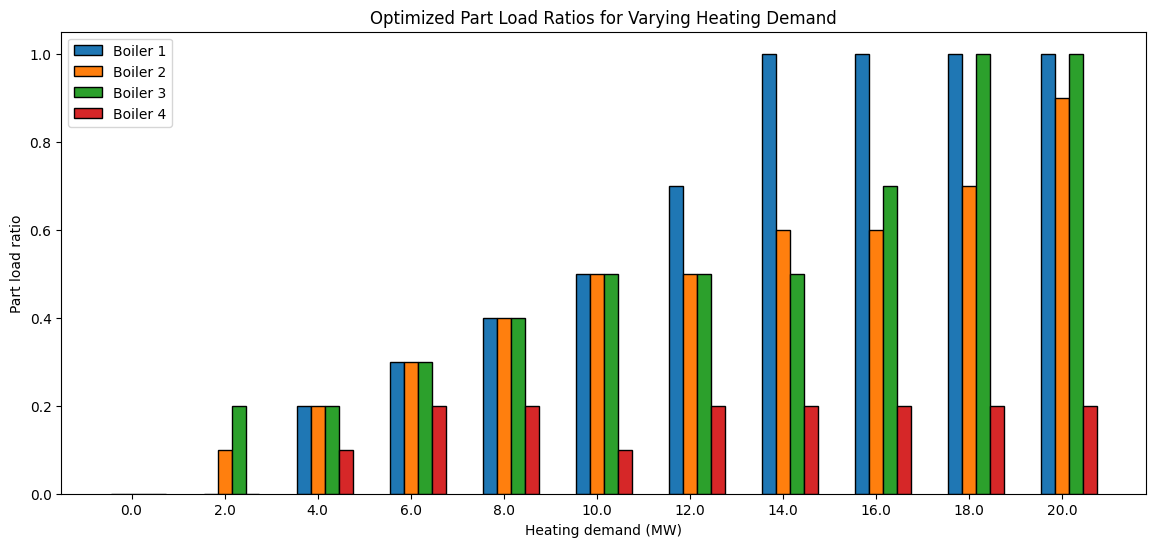

In [9]:
import matplotlib.pyplot as plt

# Plot the results using grouped bars for each boiler
bar_width = 0.3
heating_demand = sequence[:, 0]
boiler_data = sequence[:, 1:5]

# Create bars for each boiler
plt.figure(figsize=(14, 6))
for idx in range(boiler_data.shape[1]):
    plt.bar(
        heating_demand + idx * bar_width,
        boiler_data[:, idx],
        width=bar_width,
        label=f"Boiler {idx + 1}",
        edgecolor="k",
    )

# Add labels and title
plt.ylabel("Part load ratio")
plt.xlabel("Heating demand (MW)")
plt.legend(loc="upper left")
plt.title("Optimized Part Load Ratios for Varying Heating Demand")
plt.xticks(heating_demand + bar_width, heating_demand)  # Center ticks

plt.show()